In [1]:
import numba
import numpy as np
import warnings
from lib import CudaProblem, Coord

In [ ]:
# Uncomment this out if we want to ignore Performance warnings.
#warnings.filterwarnings(
#    action="ignore", category=numba.NumbaPerformanceWarning, module="numba"
#)

## Puzzle 1: Map

Implement a "kernel" (GPU function) that adds 10 to each position of vector `a`
and stores it in vector `out`.  You have 1 thread per position.

In [2]:
def map_spec(a):
    return a + 10

In [5]:
def map_test(cuda):
    def call(out, a) -> None:
        local_i = cuda.threadIdx.x
        # FILL ME IN (roughly 1 lines)

        out[local_i] = map_spec(a[local_i])
    return call

# Map
 
   Score (Max Per Thread):
   |  Global Reads | Global Writes |  Shared Reads | Shared Writes |
   |             1 |             1 |             0 |             0 | 



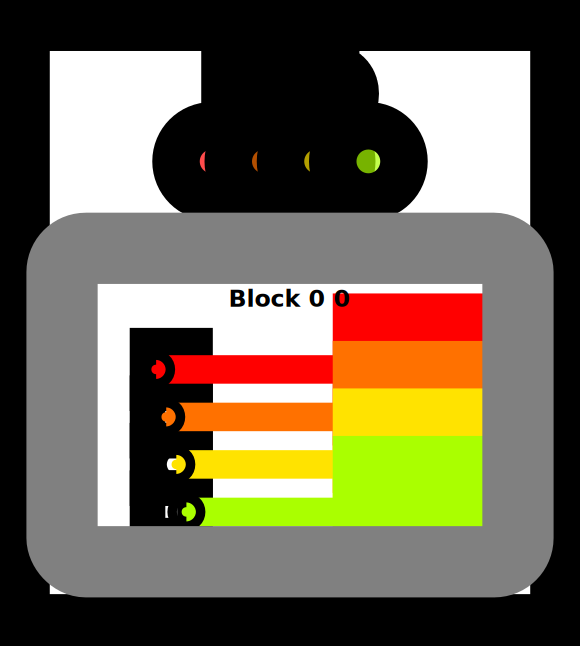

In [6]:
SIZE = 4
out = np.zeros((SIZE,))
a = np.arange(SIZE)
problem = CudaProblem(
    "Map", map_test, [a], out, threadsperblock=Coord(SIZE, 1), spec=map_spec
)
problem.show()